## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
with tf.device(device_name):
  pass

## **Load Dataset**

In [ ]:
news_data = pd.read_csv("/content/drive/MyDrive/FAKE_NEWS_CLASSIFIER/train.csv")
data = news_data.copy()
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


## **Validate Dataset**

In [ ]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
## Drop NaN values

data = data.dropna()
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [ ]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
## Get the Independent features

x = data.drop('label',axis=1)
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
## Get the Dependent features

y = data['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
x.shape

(18285, 4)

In [ ]:
y.shape

(18285,)

## ***TeXt PreProcessing***

In [ ]:
text = x.copy()

In [ ]:
text.reset_index(inplace=True)

In [ ]:
import nltk,re
from nltk.corpus import stopwords

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
### Data ProProcessing 

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

corpus = []

for i in range(0,len(text)):
  print(i)
  ## We are substitute all chracter/string except(/appert from) capital and small english letter by blank i.e. ' '
  title = re.sub('[^a-zA-Z]',' ',text['title'][i])
  ## lower text
  title = title.lower()
  ## split the text by words using space i.e. ' '
  title = title.split()
  ## stemming all the words in text after split and after removing stopwords
  title = [ps.stem(word) for word in title if not word in stopwords.words('english')]
  ## join all split word as a text line or sentence
  title = ' '.join(title)

  corpus.append(title)

Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

In [ ]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [ ]:
### Vocabulary size

voc_size = 5000

In [ ]:
### One Hot Representation

one_hot_text = [one_hot(word, voc_size) for word in corpus]
one_hot_text

[[3169, 3618, 2020, 3406, 2510, 2745, 4856, 2746, 4422, 4731],
 [2181, 1413, 250, 2147, 1453, 2171, 539],
 [4861, 4777, 2338, 1391],
 [4550, 4341, 3676, 635, 1939, 2516],
 [2410, 1453, 4492, 2288, 4704, 4414, 1453, 3819, 3288, 183],
 [901,
  3337,
  2914,
  3207,
  773,
  4354,
  775,
  1538,
  3315,
  1582,
  2576,
  1938,
  2865,
  3566,
  539],
 [2586, 895, 4584, 957, 1498, 2911, 201, 681, 765, 609, 3003],
 [120, 447, 4919, 3643, 2428, 4076, 4354, 3323, 765, 609, 3003],
 [4890, 3214, 1810, 2981, 4560, 4810, 2268, 4175, 4354, 3135],
 [1720, 2243, 3675, 1688, 243, 2723, 3789, 3200],
 [1288, 2404, 2436, 3796, 4877, 4786, 73, 4746, 1104, 4006, 652],
 [635, 2301, 2510, 4810, 4354, 2428],
 [1107, 4970, 1581, 2433, 4911, 3119, 38, 3647, 2395],
 [664, 2391, 1089, 3275, 3580, 2704, 3574, 765, 609, 3003],
 [2273, 2693, 2674, 826, 1551, 765, 609, 3003],
 [350, 686, 3925, 1817, 1119, 4069, 738, 1094, 4528, 1451],
 [1862, 3314, 1413],
 [975, 1849, 1907, 4967, 4354, 54, 4755, 539],
 [3403, 3380, 

In [ ]:
pp = max([len(i) for i in one_hot_text])
for j,i in enumerate(one_hot_text):
  if(pp==len(i)):
    print(j,i)
    break

1020 [721, 3819, 3017, 1087, 4450, 125, 2805, 2870, 2121, 4352, 4207, 2777, 423, 3314, 2128, 1836, 3897, 2805, 2613, 413, 2921, 3433, 423, 1979, 1706, 3430, 1340, 1129, 282, 4560, 1413, 2871, 4450, 635, 4975, 2081, 593, 4459, 3409, 2613, 4328, 3750, 1491, 3017, 2380, 3050, 174]


In [ ]:
## here we using padding = 'pre', cause if two sentence after converting to numerical value, is not of same length , we are using zero before sentences and make them of equal length  
## if we put padding = 'post' then zero will add after sentences. 
sent_length = 30
pad_seqence_text = pad_sequences(one_hot_text, padding = 'pre', maxlen = sent_length)
print(pad_seqence_text.shape)
pad_seqence_text

(18285, 30)


array([[   0,    0,    0, ..., 2746, 4422, 4731],
       [   0,    0,    0, ..., 1453, 2171,  539],
       [   0,    0,    0, ..., 4777, 2338, 1391],
       ...,
       [   0,    0,    0, ...,  765,  609, 3003],
       [   0,    0,    0, ..., 1654, 4153,  341],
       [   0,    0,    0, ..., 1554, 3456, 4633]], dtype=int32)

In [ ]:
pad_seqence_text[1020]

array([2805, 2613,  413, 2921, 3433,  423, 1979, 1706, 3430, 1340, 1129,
        282, 4560, 1413, 2871, 4450,  635, 4975, 2081,  593, 4459, 3409,
       2613, 4328, 3750, 1491, 3017, 2380, 3050,  174], dtype=int32)

## **Model**

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
### Creating model

embedding_vector_features = 40
# sent_length =20

model=Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 40)            200000    
                                                                 
 dropout (Dropout)           (None, 30, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


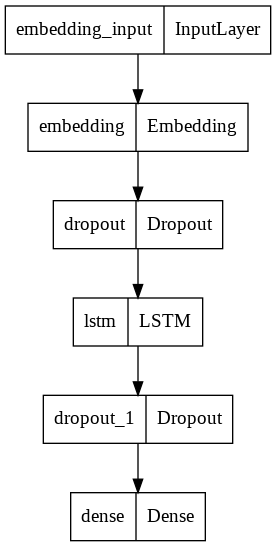

In [ ]:
tf.keras.utils.plot_model(model)

## **Model Train**

In [ ]:
x_final = np.array(pad_seqence_text)
y_final = np.array(y)

print("x_final: ",x_final.shape)
print("y_final: ",y_final.shape)

x_final:  (18285, 30)
y_final:  (18285,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_final,y_final,test_size = 0.2, random_state = 50)

In [ ]:
## training model

callbacks = [tf.keras.callbacks.ModelCheckpoint("model_save_at_{epoch}.h5"),]
with tf.device(device_name):
  model.fit(x_train,y_train, validation_data = (x_test,y_test), epochs = 20, batch_size=64, callbacks=callbacks)

Epoch 1/20
229/229 [==============================] - 12s 18ms/step - loss: 0.3276 - accuracy: 0.8556 - val_loss: 0.1925 - val_accuracy: 0.9125
Epoch 2/20
229/229 [==============================] - 4s 16ms/step - loss: 0.1510 - accuracy: 0.9392 - val_loss: 0.1762 - val_accuracy: 0.9281
Epoch 3/20
229/229 [==============================] - 4s 16ms/step - loss: 0.1092 - accuracy: 0.9587 - val_loss: 0.1988 - val_accuracy: 0.9253
Epoch 4/20
229/229 [==============================] - 4s 16ms/step - loss: 0.0802 - accuracy: 0.9722 - val_loss: 0.2210 - val_accuracy: 0.9177
Epoch 5/20
229/229 [==============================] - 4s 15ms/step - loss: 0.0528 - accuracy: 0.9820 - val_loss: 0.2241 - val_accuracy: 0.9229
Epoch 6/20
229/229 [==============================] - 4s 16ms/step - loss: 0.0414 - accuracy: 0.9859 - val_loss: 0.2991 - val_accuracy: 0.9185
Epoch 7/20
229/229 [==============================] - 4s 16ms/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.3376 - val_accuracy: 0.916

## **Prediction and Accuracy**

In [ ]:
## Performance Metrics and accuracy

y_pred = model.predict(x_test)

In [ ]:
# prd_1 = model.predict_classes(x_test)
# prd_1

In [ ]:
y_pred

array([[9.9986243e-01],
       [2.3688917e-09],
       [1.5582532e-11],
       ...,
       [2.9759587e-12],
       [3.5171626e-05],
       [9.9996090e-01]], dtype=float32)

In [ ]:
y_pred = np.array([round(i[0]) for i in y_pred])
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1987,  152],
       [ 148, 1370]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9179655455291222